In [2]:
from pg import DB
db = DB()

In [13]:
motifNames_num = db.query("SELECT count(*) FROM motifss ").getresult()
motifNames_num

[(64846,)]

In [14]:
motifNames_avg_score_num = db.query("SELECT average_score FROM motifss where average_score NOTNULL and shuffled_average_score NOTNULL").ntuples()
motifNames_avg_score_num

64846

In [7]:
db.query("SELECT  count(size) FROM samples_scores ").ntuples()


1

In [63]:
db.query("Select count(*) from motif_average_scores where shuffled_proteins_length >= 2 and shuffled_proteins_length <= 500").getresult()



[(1263935,)]

In [93]:
db.query("Select count(*) from motif_average_scores where shuffled_average_score != 'nan'").getresult()



[(1263954,)]

In [99]:
db.query("Select count(shuffled_average_score) from motif_average_scores where shuffled_proteins_length >= 2 and shuffled_proteins_length <= 500 and shuffled_p_value isnull  ").getresult()[0:100]
1263954-181662


1082292

In [14]:
db.query("SELECT max(proteins_length) FROM motif").getresult()

[(1381,)]

In [22]:
db.query("SELECT max(shuffled_proteins_length) FROM motif").getresult()

[(1227,)]

In [11]:
db.query("SELECT motif_string FROM motifs where shuffled_subgraph NOTNULL").ntuples()

0

In [301]:
q = db.query("""SELECT *, pg_size_pretty(total_bytes) AS total
    , pg_size_pretty(index_bytes) AS INDEX
    , pg_size_pretty(toast_bytes) AS toast
    , pg_size_pretty(table_bytes) AS TABLE
  FROM (
  SELECT *, total_bytes-index_bytes-COALESCE(toast_bytes,0) AS table_bytes FROM (
      SELECT c.oid,nspname AS table_schema, relname AS TABLE_NAME
              , c.reltuples AS row_estimate
              , pg_total_relation_size(c.oid) AS total_bytes
              , pg_indexes_size(c.oid) AS index_bytes
              , pg_total_relation_size(reltoastrelid) AS toast_bytes
          FROM pg_class c
          LEFT JOIN pg_namespace n ON n.oid = c.relnamespace
          WHERE relkind = 'r'
  ) a
) a; """)

In [302]:
q.getresult()[8]

(451860,
 'public',
 'random_samples_average_score',
 1711040.0,
 77283328,
 0,
 None,
 77283328,
 '74 MB',
 '0 bytes',
 None,
 '74 MB')

In [10]:
db.query("Select Distinct size from random_samples_average_score order by size desc").ntuples()

171

In [11]:
db.query("Select count(size) from random_samples_average_score").getresult()

[(1705169,)]

In [166]:
size = 10
db.query("Select count(size) from random_samples_average_score where size = '" + str(size) +"'").getresult()[0][0]

0

In [167]:
sizes_of_protein_sets_in_data_set = db.query("SELECT proteins_length FROM motif").getresult()
sizes_of_protein_sets_in_shuffled_data_set = db.query("SELECT shuffled_proteins_length FROM motif").getresult()

In [168]:
import pandas
sizes_of_protein_sets_in_data_set = db.query("SELECT proteins_length FROM motif").getresult()
sizes_of_protein_sets_in_shuffled_data_set = db.query("SELECT shuffled_proteins_length FROM motif").getresult()
sizes_of_protein_sets_unique = set(sizes_of_protein_sets_in_data_set+sizes_of_protein_sets_in_shuffled_data_set)
df = pandas.DataFrame(list(sizes_of_protein_sets_unique))
df.describe()#metadata about sizes

,0
count,730.000000
mean,397.178082
std,266.739792
min,2.000000
25%,184.250000
50%,366.500000
75%,552.500000
max,1381.000000


In [229]:
sizes_of_protein_sets_unique.sort()

AttributeError: 'set' object has no attribute 'sort'

In [605]:
db.query("SELECT count(shuffled_p_value) FROM motif where shuffled_p_value NOTNULL").getresult()


[(21299,)]

In [31]:
db.query("SELECT count(p_value) FROM motifss where p_value NOTNULL").getresult()



[(2016,)]

In [321]:
db.query("SELECT count(tt_average_score) FROM motif where tt_average_score NOTNULL").getresult()

[(101,)]

In [379]:
min_p = db.query("SELECT motif_string , p_value FROM motif where p_value > 0 order by p_value ").getresult()
min_p_shuffle = db.query("SELECT motif_string, shuffled_p_value FROM motif where shuffled_p_value >0 order by shuffled_p_value").getresult()
min_p[0]


('cagtcgga', 0.0002)

In [380]:
min_p_shuffle[0]

('gagcgctc', 0.0001)

In [490]:
min_score_samples = db.query("SELECT size , average_score FROM random_samples_average_score where size = '85' order by average_score DESC").getresult()
print(min_score_samples[10])
# print(min_score_samples[200])




(85, 0.0529100836927)


In [491]:
p_count = db.query("SELECT count(motif_string) FROM motifss where average_score > '0.0529100836927' and proteins_length = 85 ").getresult()
p_count


[(1,)]

In [492]:
shuff_p_count = db.query("SELECT count(motif_string) FROM motif where shuffled_average_score > '0.0529100836927'  and shuffled_proteins_length = 85").getresult()
shuff_p_count


[(5,)]

In [483]:
shuff_p = db.query("SELECT motif_string, shuffled_proteins_length, shuffled_p_value  FROM motif where   shuffled_p_value < 0.001 and shuffled_proteins_length = 85  order by shuffled_proteins_length").getresult()
shuff_p


[('ggttcatt', 85, 0.0),
 ('attactcg', 85, 0.0007),
 ('gagggttg', 85, 0.0006),
 ('gtttacga', 85, 0.0),
 ('cgagaggg', 85, 0.0)]

In [441]:
p = db.query("SELECT motif_string, proteins_length FROM motif where p_value < 0.001 order by proteins_length").getresult()
p

[('gctaacgc', 7),
 ('atatacgg', 12),
 ('cggtcatg', 13),
 ('cagtcgga', 13),
 ('cctcggat', 13),
 ('gggcgaga', 22),
 ('agccccga', 28),
 ('cattaggc', 45),
 ('gtccatat', 55),
 ('cctaacca', 56),
 ('atagaggg', 58),
 ('taactcac', 60),
 ('gactctcc', 62),
 ('gctatgca', 69),
 ('agaccagt', 82),
 ('gtttagct', 85),
 ('ttcatgac', 98)]

In [506]:
db.query("SELECT count(*) FROM motifss ").getresult()[0]


(3177,)

In [580]:
p_lengths_to_score = db.query("SELECT proteins_length, tt_average_score FROM motifss ").getresult()
shuffled_p_lengths_to_score = db.query("SELECT shuffled_proteins_length, tt_shuffled_average_score FROM motifss ").getresult()
smaples_p_lengths_to_score = db.query("SELECT size, tt_average_score FROM random_samples_average_score ").getresult()


df_lenghts_to_score = pandas.DataFrame(p_lengths_to_score)
df_lenghts_to_score.columns = ["lengths", "score"]

df_shuffled_lenghts_to_score = pandas.DataFrame(shuffled_p_lengths_to_score)
df_shuffled_lenghts_to_score.columns = ["lengths", "score"]

df_samples_lenghts_to_score = pandas.DataFrame(smaples_p_lengths_to_score)
df_samples_lenghts_to_score.columns = ["lengths", "score"]

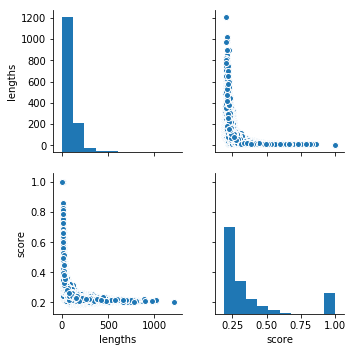

In [582]:
import seaborn as sns

sns.pairplot(df_lenghts_to_score.dropna());

In [18]:
foo = db.query("Select motif_string, average_score, tt_average_score from motif_average_scores where proteins_length = 20 and average_score" ).getresult()


In [64]:
import pandas
import numpy as np
import pickle
# min(pandas.DataFrame(foo)[2])

In [94]:
db.query("Select count(*) from motif_average_scores where average_score = 'nan' and tt_average_score != 'nan'" ).getresult()



[(0,)]

In [56]:
foo[2] +1/1000

nan

In [67]:
foo

('aaaa...[ag]', 3195, nan, nan)

In [65]:
size = 30
samples =  pickle.load( open( "files/intermediates/samples/sample_" + str(size) + ".pkl", "rb" ) )
average_sample_scores_of_size = np.array(samples['average_scores'])
tt_average_sample_scores_of_size = np.array(samples['tt_average_scores'])
total_distribution = len(samples['average_scores'])

In [80]:
motif_average_score = foo[2]

right_of_distribution = sum(average_sample_scores_of_size > motif_average_score)



/Users/qahme/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until


In [81]:
right_of_distribution

0

In [89]:
import math
math.isnan(motif_average_score)

True

In [95]:
x=float('nan')

In [96]:
x

nan